# 아파트 가격 데이터
- 정부의 대책에도 불구하고 주택에 대한 국민들의 불편함이 계속해서 나오고 있다.
- 부동산 가격이 계속해서 오르고 있다는데 국민들이 가장 선호하는 주택 형태인 아파트에 그 변동이 적용되는지 알아보고자 한다.

# 데이터 셋
- 공공데이터 포털 https://www.data.go.kr/data/15061057/fileData.do
    
## 전국 평균 분양가격(2013년 9월부터 2015년 8월까지)¶
## 주택도시보증공사 전국 신규 민간아파트 분양가격 동향 20201116

# 라이브러리 불러오기 & 폰트설정

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

plt.rc("font", family = "Malgun Gothic")
plt.rc("axes", unicode_minus=False)

from IPython.display import set_matplotlib_formats
set_matplotlib_formats("retina")

# 데이터 불러오기

In [2]:
df_2013 = pd.read_csv("./전국 평균 분양가격(2013년 9월부터 2015년 8월까지).csv", encoding="cp949")
df_2020 = pd.read_csv("./주택도시보증공사_전국 신규 민간아파트 분양가격 동향_20201116.csv", encoding="cp949")

In [3]:
df_2013.head()

,지역,2013년12월,2014년1월,2014년2월,2014년3월,2014년4월,2014년5월,2014년6월,2014년7월,2014년8월,...,2014년11월,2014년12월,2015년1월,2015년2월,2015년3월,2015년4월,2015년5월,2015년6월,2015년7월,2015년8월
0,서울,18189,17925,17925,18016,18098,19446,18867,18742,19274,...,20242,20269,20670,20670,19415,18842,18367,18374,18152,18443
1,부산,8111,8111,9078,8965,9402,9501,9453,9457,9411,...,9208,9208,9204,9235,9279,9327,9345,9515,9559,9581
2,대구,8080,8080,8077,8101,8267,8274,8360,8360,8370,...,8439,8253,8327,8416,8441,8446,8568,8542,8542,8795
3,인천,10204,10204,10408,10408,10000,9844,10058,9974,9973,...,10020,10020,10017,9876,9876,9938,10551,10443,10443,10449
4,광주,6098,7326,7611,7346,7346,7523,7659,7612,7622,...,7752,7748,7752,7756,7861,7914,7877,7881,8089,8231


In [4]:
df_2020.head()

,지역명,규모구분,연도,월,분양가격(㎡)
0,서울,전체,2015,10,5841
1,서울,전용면적 60㎡이하,2015,10,5652
2,서울,전용면적 60㎡초과 85㎡이하,2015,10,5882
3,서울,전용면적 85㎡초과 102㎡이하,2015,10,5721
4,서울,전용면적 102㎡초과,2015,10,5879


In [5]:
df_2020.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5185 entries, 0 to 5184
Data columns (total 5 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   지역명      5185 non-null   object
 1   규모구분     5185 non-null   object
 2   연도       5185 non-null   int64 
 3   월        5185 non-null   int64 
 4   분양가격(㎡)  4780 non-null   object
dtypes: int64(2), object(3)
memory usage: 202.7+ KB


## 필요한 columns 추가 및 결측치 확인
- 2013 ~ 2015까지의 데이터는 가격만 제시되어있고 일반 분양가격(㎡)이 아닌 평당분양가격으로 제시되어 있다.
- 데이터 취합을 위해 가격 기준을 맞추고 새로운 column을 생성한다.

In [6]:
df_2020.isnull().sum()

지역명          0
규모구분         0
연도           0
월            0
분양가격(㎡)    405
dtype: int64

- 계산 가능하도록 문자열에서 숫자열로 변경
- 분양가격에서 3.3을 곱한 평당분양가격 column을 추가해 비교가능하도록 설정한다.

In [8]:
df_2020["분양가격"] = pd.to_numeric(df_2020["분양가격(㎡)"], errors='coerce')

df_2020["평당분양가격"] = df_2020["분양가격"] * 3.3
df_2020.head()

,지역명,규모구분,연도,월,분양가격(㎡),분양가격,평당분양가격
0,서울,전체,2015,10,5841,5841.0,19275.3
1,서울,전용면적 60㎡이하,2015,10,5652,5652.0,18651.6
2,서울,전용면적 60㎡초과 85㎡이하,2015,10,5882,5882.0,19410.6
3,서울,전용면적 85㎡초과 102㎡이하,2015,10,5721,5721.0,18879.3
4,서울,전용면적 102㎡초과,2015,10,5879,5879.0,19400.7


In [9]:
df_2020 = df_2020.drop(["분양가격(㎡)"], axis=1)

- 2015이전 데이터는 이후 데이터와 형태가 다르다. 열데이터를 행데이터로 전환하여 데이터의 형태를 맞추어 준다.
- 지역을 지역명으로, 기간을 연도와 월 형태로 나누어준다.

In [10]:
df_2013_melt = df_2013.melt(id_vars="지역",var_name="기간", value_name="평당분양가격")
df_2013_melt.columns =  ["지역명", "기간", "평당분양가격"] 

In [11]:
df_2013_melt.head()

,지역명,기간,평당분양가격
0,서울,2013년12월,18189
1,부산,2013년12월,8111
2,대구,2013년12월,8080
3,인천,2013년12월,10204
4,광주,2013년12월,6098


In [12]:
# 연,월 구분하는 함수 만들기

def split_year(date):
    year = date.split("년")[0]
    year = int(year) # 데이터가 int 타입이 되도록
    return year

def split_month(date):
    month = date.split("년")[-1].replace("월","")
    month = int(month)
    return month

In [13]:
df_2013_melt["연도"] = df_2013_melt["기간"].apply(split_year)
df_2013_melt["월"] = df_2013_melt["기간"].apply(split_month)
df_2013_melt.sample(5)

,지역명,기간,평당분양가격,연도,월
273,부산,2015년4월,9327,2015,4
301,전북,2015년5월,6556,2015,5
250,전북,2015년2월,6583,2015,2
297,세종,2015년5월,8546,2015,5
172,대구,2014년10월,8403,2014,10


In [14]:
# cols 사용할 column명들
cols = ['지역명', '연도', '월', '평당분양가격'] 

# 2015이전 데이터의 경우 규모구분이 따로 설정되어 있지 않아 비교를 위해 2015년이후는 '전체'에 해당하는 데이터만 추출
df_2020_compare = df_2020.loc[df_2020["규모구분"] == "전체",cols].copy()
df_2020_compare.head()

,지역명,연도,월,평당분양가격
0,서울,2015,10,19275.3
5,인천,2015,10,10437.9
10,경기,2015,10,10355.4
15,부산,2015,10,10269.6
20,대구,2015,10,8850.6


In [15]:
df_2013_compare = df_2013_melt[cols].copy()
df_2013_compare.head()

,지역명,연도,월,평당분양가격
0,서울,2013,12,18189
1,부산,2013,12,8111
2,대구,2013,12,8080
3,인천,2013,12,10204
4,광주,2013,12,6098


## 데이터 결합

- concat을 이용하여 2015년 이전, 이후 데이터를 합쳐준다

In [16]:
df = pd.concat([df_2013_compare, df_2020_compare])
df

,지역명,연도,월,평당분양가격
0,서울,2013,12,18189.0
1,부산,2013,12,8111.0
2,대구,2013,12,8080.0
3,인천,2013,12,10204.0
4,광주,2013,12,6098.0
...,...,...,...,...
5160,전북,2020,10,8487.6
5165,전남,2020,10,8969.4
5170,경북,2020,10,10114.5
5175,경남,2020,10,10253.1


In [17]:
# 연도별 data의 개수는?
df["연도"].value_counts(sort=False)

2013     17
2014    204
2015    187
2016    204
2017    204
2018    204
2019    204
2020    170
Name: 연도, dtype: int64

# 데이터시각화

## 전국데이터

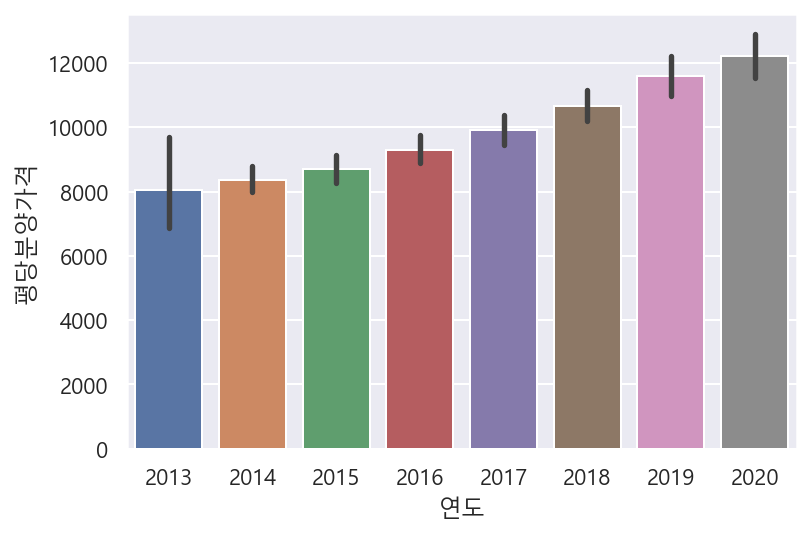

In [18]:
sns.barplot(data=df, x="연도", y="평당분양가격")

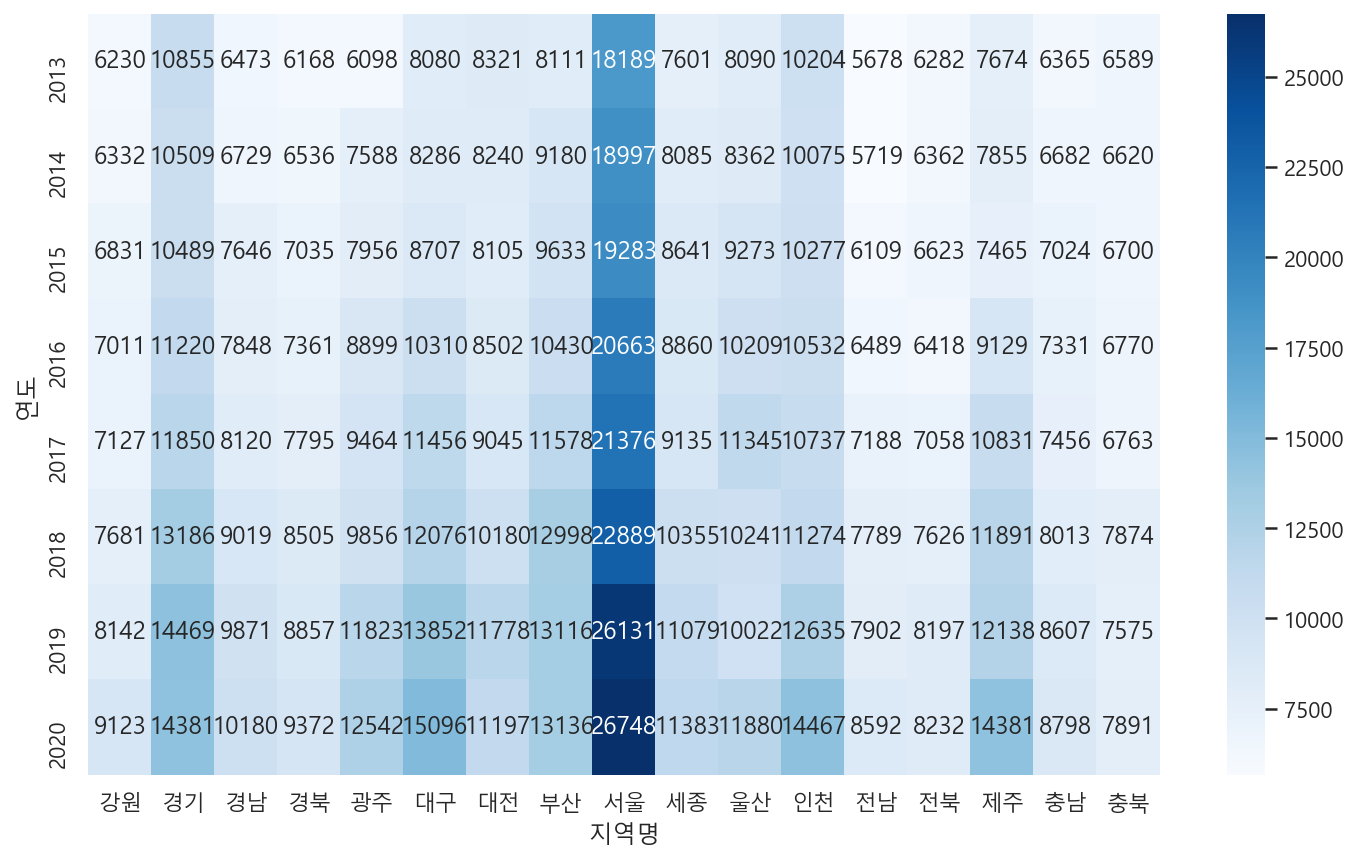

In [19]:
# 히트맵을 사용하여 지역별, 연도별 가격을 확인한다.
table = pd.pivot_table(df, index="연도", columns="지역명", values="평당분양가격").round()

plt.figure(figsize=(12, 7))
sns.heatmap(table, cmap="Blues", annot=True, fmt=".0f")

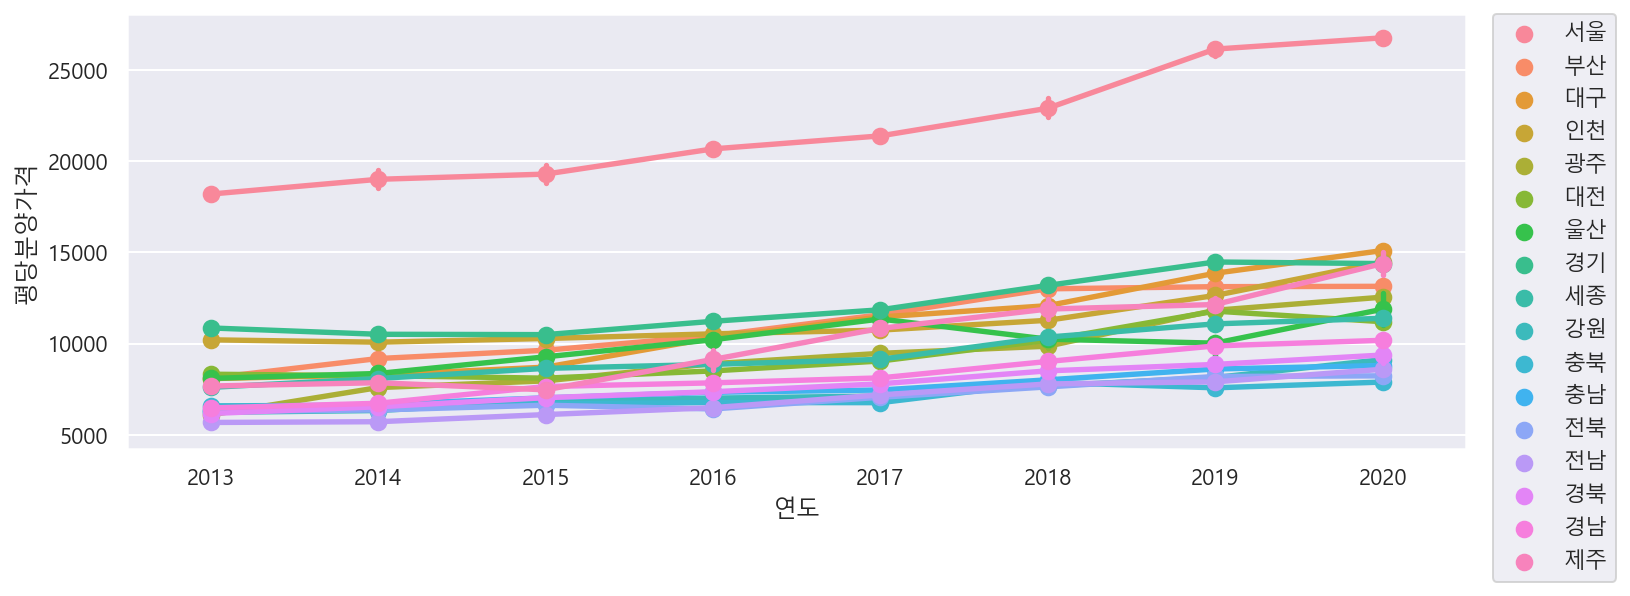

In [20]:
# pointplot으로 나타내기

plt.figure(figsize=(12,4))
sns.pointplot(data=df, x="연도", y="평당분양가격", hue="지역명")
plt.legend(bbox_to_anchor=(1.02, 1), loc=2, borderaxespad=0.)

## 지역별데이터

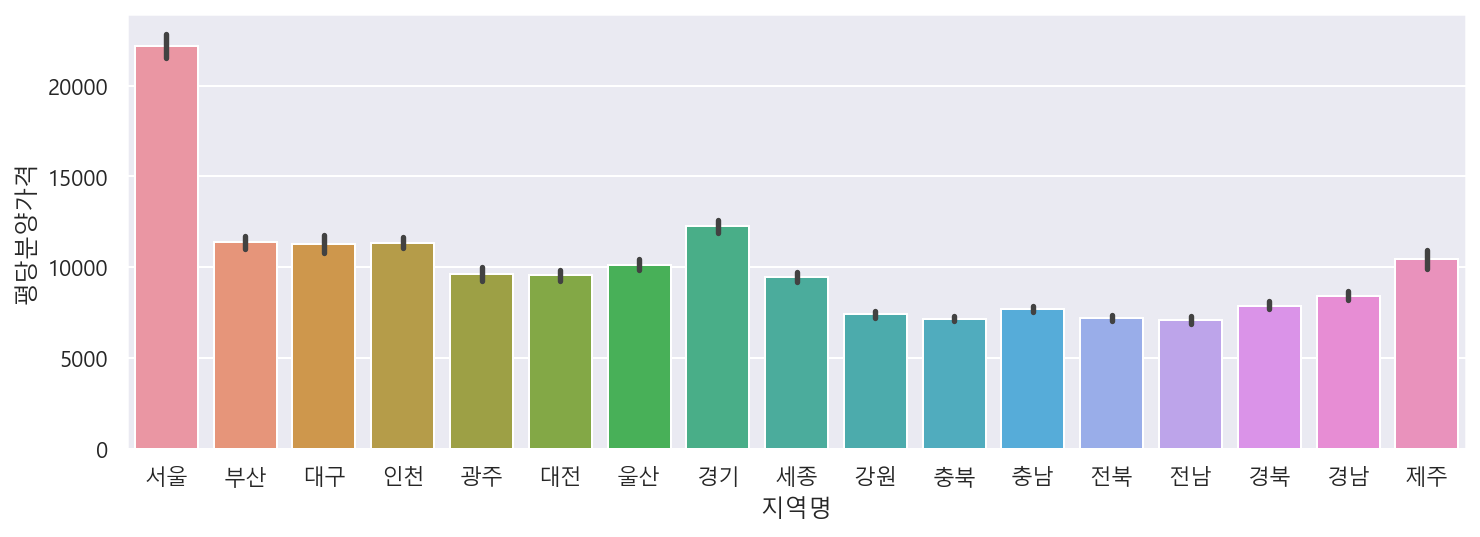

In [21]:
plt.figure(figsize=(12,4))
sns.barplot(data=df, x="지역명", y="평당분양가격")

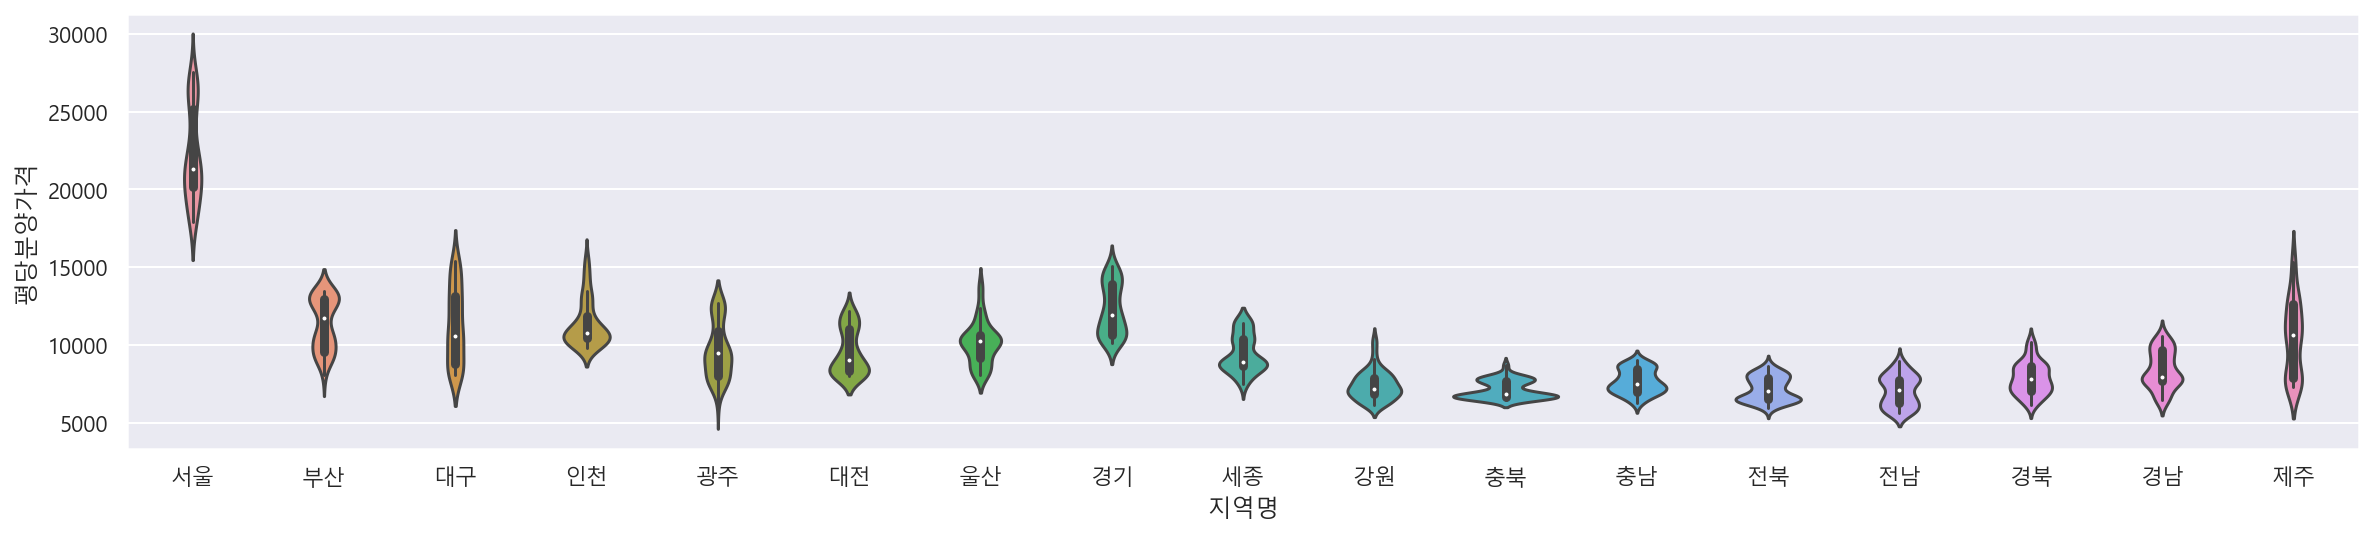

In [22]:
# violinplot으로 가시화를 더 쉽게하여 나타내본다.
plt.figure(figsize=(20, 4))
sns.violinplot(data=df, x="지역명", y="평당분양가격")

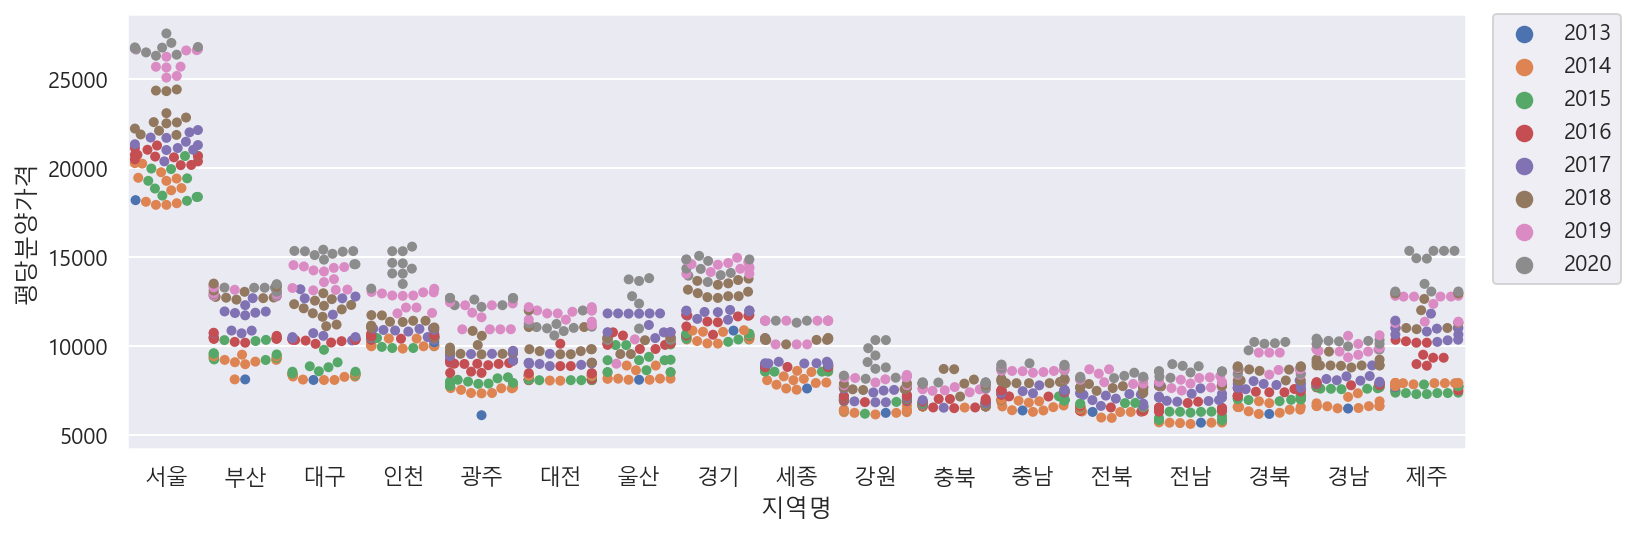

In [24]:
# swarmplot으로 연도별 지역의 평균가격을 확인해본다.
plt.figure(figsize=(12, 4))
sns.swarmplot(data=df, x="지역명", y="평당분양가격", hue="연도")
plt.legend(bbox_to_anchor=(1.02, 1), loc=2, borderaxespad=0.)

- 5.1 전국데이터 확인결과 해가 지나갈 수록 아파트 분양가격이 상승하고 있음을 확인할 수 있다.
- 5.1 heatmap에서 확인할 수 있듯, 수도권(서울, 경기)의 집값이 다른 지역보다 높음을 알 수 있다.

- 5.1 pointplot과 5.2지역별데이터의 경우 서울과 다른 지역의 분양가격 차이를 더욱 확연히 알 수 있다.
- 5.2 swarmplot에서 확인할 수 있듯, 서울의 경우 2018년 이후의 데이터가 뚜렷하게 상승하고 있음을 알 수 있다. 
- 전국의 데이터 역시 2018년 이후상승하고 있음을 알 수 있다.(갈색, 연보라색, 회색) 

# 2015년 이후 아파트 가격 데이터 자세하게 살펴보기

- 2015년 이후 데이터는 이전과 다르게 교모구분 column을 통해 규모구분 별 데이터를 더욱 자세히 다룰 수 있다.

In [26]:
# 이런식으로 확인 가능.
df_2020.groupby(["지역명","규모구분"])["평당분양가격"].mean().round()

지역명  규모구분             
강원   전용면적 102㎡초과          9149.0
     전용면적 60㎡이하           7865.0
     전용면적 60㎡초과 85㎡이하     7752.0
     전용면적 85㎡초과 102㎡이하    8868.0
     전체                   7752.0
                           ...  
충북   전용면적 102㎡초과          8341.0
     전용면적 60㎡이하           7240.0
     전용면적 60㎡초과 85㎡이하     7365.0
     전용면적 85㎡초과 102㎡이하    8467.0
     전체                   7331.0
Name: 평당분양가격, Length: 85, dtype: float64

In [28]:
# 지역과 상관없는 규모구분별 가격
df_2020.groupby(["규모구분"])["평당분양가격"].mean()

규모구분
전용면적 102㎡초과          11882.902845
전용면적 60㎡이하           10700.634247
전용면적 60㎡초과 85㎡이하     10591.392729
전용면적 85㎡초과 102㎡이하    11620.084559
전체                   10594.894627
Name: 평당분양가격, dtype: float64

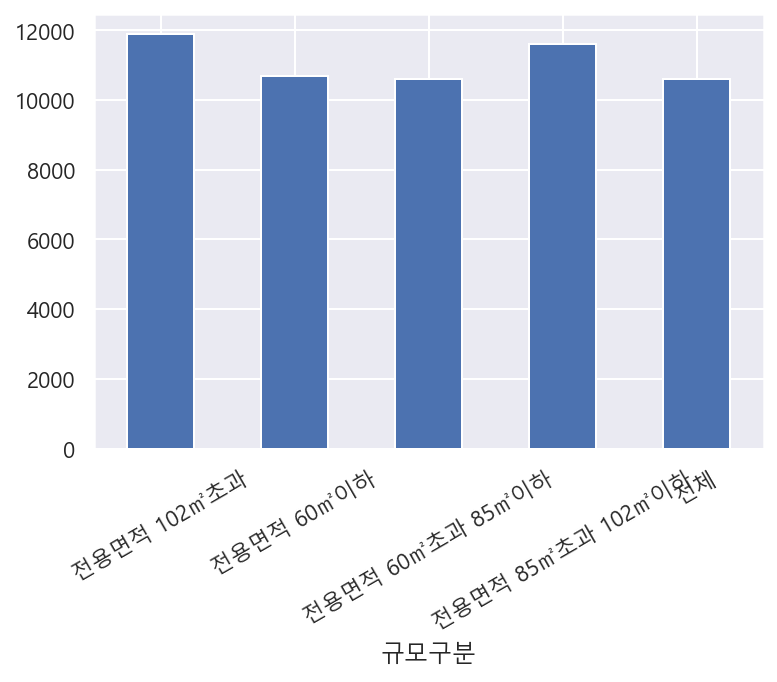

In [31]:
df_2020.groupby(["규모구분"])["평당분양가격"].mean().plot.bar(rot=30)

- 60㎡이하의 아파트의 평균가격이 60㎡초과 85㎡이하의 아파트의 평균가격보다 높음을 확인할 수 있다.
- 주어진 데이터로 유추하였을때 지역에 비해 수도권의 아파트 형태가 더욱 다양하고, 좁은 면적의 아파트 역시 많을것으로 가정한다면
- 수도권의 적은 평수 아파트가 평균가격 인상에 영향을 미쳤음을 유추할 수 있다.